In [62]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [63]:
dataset_dir = 'raf_dataset'

In [64]:
for label in os.listdir(os.path.join(dataset_dir, 'train')):
    label_dir = os.path.join(dataset_dir, 'train', label)
    print(label_dir)

raf_dataset\train\1
raf_dataset\train\2
raf_dataset\train\3
raf_dataset\train\4
raf_dataset\train\5
raf_dataset\train\6
raf_dataset\train\7


In [65]:

X_train = []
y_train = []

for label in os.listdir(os.path.join(dataset_dir, 'train')):
    label_dir = os.path.join(dataset_dir, 'train', label)
    if os.path.isdir(label_dir):

        # przechodzę przez każdy obraz w podfolderze
        for filename in os.listdir(label_dir):

            # zapisuję ścieżkę do obrazu
            img_path = os.path.join(label_dir, filename)

            # wczytuję obraz
            # ważne: jeśli nie wczytam tutaj w skali szarości, to wczytują się 3 kanały koloru (RGB)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))

            # jeśli obraz został odpowiednio wczytany
            if img is not None:

                # dodaję obraz oraz odpowiadającą mu etykietę do list
                X_train.append(img)
                y_train.append(label)

In [66]:
X_test = []
y_test = []

for label in os.listdir(os.path.join(dataset_dir, 'test')):
    label_dir = os.path.join(dataset_dir, 'test', label)
    if os.path.isdir(label_dir):

        # przechodzę przez każdy obraz w podfolderze
        for filename in os.listdir(label_dir):

            # zapisuję ścieżkę do obrazu
            img_path = os.path.join(label_dir, filename)

            # wczytuję obraz
            # ważne: jeśli nie wczytam tutaj w skali szarości, to wczytują się 3 kanały koloru (RGB)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (48, 48))

            # jeśli obraz został odpowiednio wczytany
            if img is not None:

                # dodaję obraz oraz odpowiadającą mu etykietę do list
                X_test.append(img)
                y_test.append(label)

In [67]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [68]:
# Sprawdzenie kształtu danych 
print("Kształt X_train:", X_train.shape)
print("Kształt y_train:", y_train.shape)
print("Kształt X_test:", X_test.shape)
print("Kształt y_test:", y_test.shape)

Kształt X_train: (12271, 48, 48)
Kształt y_train: (12271,)
Kształt X_test: (3068, 48, 48)
Kształt y_test: (3068,)


Zdjęcia rozmiaru 100 x 100 pikseli

In [69]:
len(X_train)

12271

In [70]:
X_train[0]

array([[198, 238, 170, ..., 154, 158, 192],
       [184, 187, 162, ..., 171, 157, 171],
       [182, 150, 139, ..., 121, 143, 164],
       ...,
       [ 84,  84,  98, ..., 137, 151, 168],
       [106,  99, 107, ..., 143, 153, 156],
       [107,  84,  81, ..., 154, 169, 179]], dtype=uint8)

In [71]:
y_test

array(['1', '1', '1', ..., '7', '7', '7'], dtype='<U1')

In [72]:
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

Y_train = to_categorical(y_train_encoded, 7)
Y_test = to_categorical(y_test_encoded, 7)

In [73]:
print(f"y_test_encoded:\n{y_test_encoded}")
print(f"Y_test:\n{Y_test}")

y_test_encoded:
[0 0 0 ... 6 6 6]
Y_test:
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [74]:
emotion_mapper = {
    '1': 'surprise',
    '2': 'fear',
    '3': 'disgust',
    '4': 'happy',
    '5': 'sadness',
    '6': 'anger',
    '7': 'neutral'
}

Text(0.5, 1.0, 'Emotion : surprise')

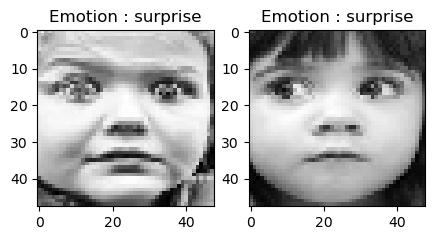

In [75]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Emotion : {}".format(emotion_mapper[y_train[0]]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Emotion : {}".format(emotion_mapper[y_test[0]]))

In [76]:
# zmiana wymiarów
X_train = X_train.reshape(-1, 48,48, 1)
X_test = X_test.reshape(-1, 48, 48, 1)
X_train.shape, X_test.shape

# zmiana typu oraz normalizacja
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

# wydzielenie dodatkowo podzbioru walidacyjnego do oceny jakości sieci po każdej epoce
X_train, X_valid, train_label, valid_label = train_test_split(X_train, Y_train, test_size=0.2, random_state=13)

In [77]:
X_train.shape, X_valid.shape, train_label.shape, valid_label.shape

((9816, 48, 48, 1), (2455, 48, 48, 1), (9816, 7), (2455, 7))

In [78]:
# biblioteki niezbędne do zbudowania modelu
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [79]:
batch_size = 64

# 20 epok uczenia
epochs = 20

# u nas jest 7 klas emocji
num_classes = 7

In [80]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(48, 48, 1), padding='same'))
emotion_model.add(LeakyReLU(alpha=0.1))
emotion_model.add(MaxPooling2D((2, 2), padding='same'))

emotion_model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
emotion_model.add(LeakyReLU(alpha=0.1))
emotion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

emotion_model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
emotion_model.add(LeakyReLU(alpha=0.1))
emotion_model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

emotion_model.add(Flatten())

emotion_model.add(Dense(128, activation='linear'))
emotion_model.add(LeakyReLU(alpha=0.1))

emotion_model.add(Dense(num_classes, activation='softmax'))

In [81]:
emotion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [82]:
emotion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                  

In [83]:
emotion_train = emotion_model.fit(
    X_train, 
    train_label, 
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_valid, valid_label))

Epoch 1/20
154/154 [==============================] - 14s 88ms/step - loss: 1.4886 - accuracy: 0.4546 - val_loss: 1.2241 - val_accuracy: 0.5703
Epoch 2/20
154/154 [==============================] - 14s 94ms/step - loss: 1.0527 - accuracy: 0.6242 - val_loss: 0.9669 - val_accuracy: 0.6619
Epoch 3/20
154/154 [==============================] - 14s 94ms/step - loss: 0.8726 - accuracy: 0.6903 - val_loss: 0.9354 - val_accuracy: 0.6692
Epoch 4/20
154/154 [==============================] - 14s 89ms/step - loss: 0.7603 - accuracy: 0.7288 - val_loss: 0.8600 - val_accuracy: 0.6925
Epoch 5/20
154/154 [==============================] - 14s 89ms/step - loss: 0.6438 - accuracy: 0.7756 - val_loss: 0.8244 - val_accuracy: 0.7132
Epoch 6/20
154/154 [==============================] - 15s 97ms/step - loss: 0.5511 - accuracy: 0.8082 - val_loss: 0.8093 - val_accuracy: 0.7283
Epoch 7/20
154/154 [==============================] - 15s 95ms/step - loss: 0.4461 - accuracy: 0.8459 - val_loss: 0.8706 - val_accuracy:

In [84]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

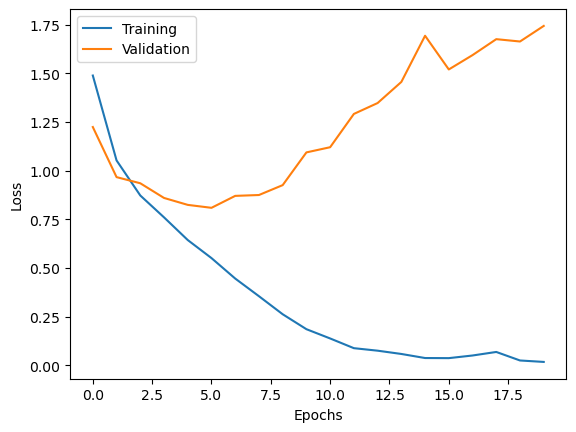

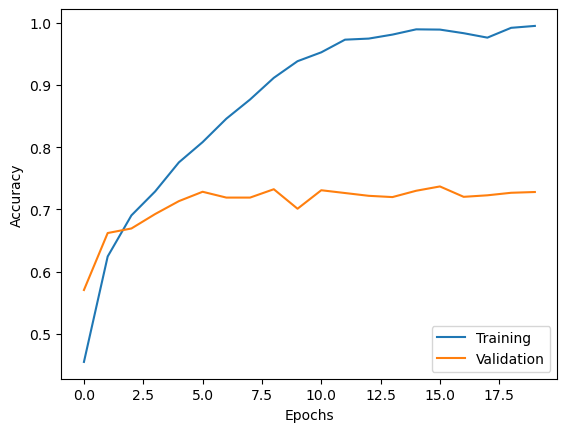

In [85]:
plot_history(emotion_train)

In [86]:
test_eval = emotion_model.evaluate(X_test, Y_test, verbose=0)

In [87]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.7456474304199219
Test accuracy: 0.7284876108169556


In [88]:
predicted_classes = emotion_model.predict(X_test)

# przekształcenie wartości predicted_classes, które są liczbami zmiennoprzecinkowymi na integery
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

96/96 [==============================] - 1s 13ms/step


In [89]:
predicted_classes

array([0, 0, 0, ..., 6, 3, 5], dtype=int64)

In [90]:
predicted_classes.shape, Y_test.shape

((3068,), (3068, 7))

Found 2225 correct labels


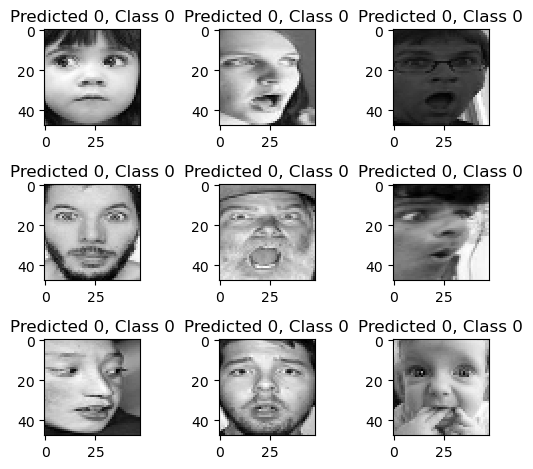

In [91]:
correct = np.where(predicted_classes==y_test_encoded)[0]
print(f"Found {len(correct)} correct labels")
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(48,48), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test_encoded[correct]))
    plt.tight_layout()

Found 843 incorrect labels


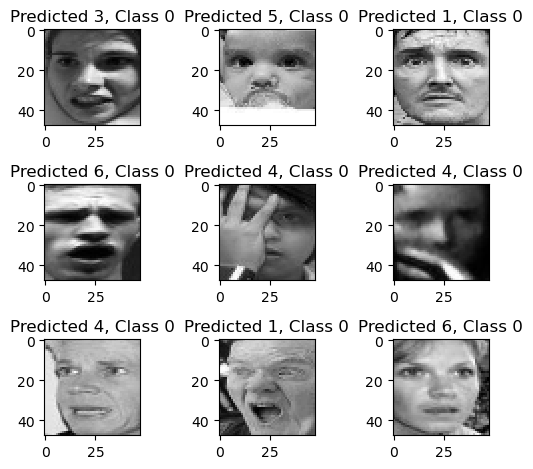

In [94]:
incorrect = np.where(predicted_classes!=y_test_encoded)[0]
print(f"Found {len(incorrect)} incorrect labels")
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(48,48), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test_encoded[incorrect]))
    plt.tight_layout()

In [96]:
# Mapowanie emocji na inty:

label_encoder = LabelEncoder()
label_encoder.fit(y_test)

for word, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{emotion_mapper[word]}: {encoded_label}")

surprise: 0
fear: 1
disgust: 2
happy: 3
sadness: 4
anger: 5
neutral: 6
